In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('hrdataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [184]:
#lets check out the columns 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [185]:
#we will drop the perticular columns whch are not important
df.drop(['BusinessTravel','Department','EducationField'],axis=1,inplace=True)

In [186]:
df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2
5,32,No,1005,2,2,1,8,4,Male,79,...,3,80,0,8,2,2,7,7,3,6
6,59,No,1324,3,3,1,10,3,Female,81,...,1,80,3,12,3,2,1,0,0,0
7,30,No,1358,24,1,1,11,4,Male,67,...,2,80,1,1,2,3,1,0,0,0
8,38,No,216,23,3,1,12,4,Male,44,...,2,80,0,10,2,3,9,7,1,8
9,36,No,1299,27,3,1,13,3,Male,94,...,2,80,2,17,3,2,7,7,7,7


In [187]:
#lets check some value counts for Attrition 
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [188]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [189]:
attrition = pd.get_dummies(df['Attrition'],drop_first=True)

In [190]:
#lets concat this df to our main df

In [191]:
df = pd.concat([df,gender,attrition],axis=1)

In [192]:
df.head(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,Yes
0,41,Yes,1102,1,2,1,1,2,Female,94,...,0,8,0,1,6,4,0,5,0,1
1,49,No,279,8,1,1,2,3,Male,61,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,1373,2,2,1,4,4,Male,92,...,0,7,3,3,0,0,0,0,1,1
3,33,No,1392,3,4,1,5,4,Female,56,...,0,8,3,3,8,7,3,0,0,0
4,27,No,591,2,1,1,7,1,Male,40,...,1,6,3,3,2,2,2,2,1,0
5,32,No,1005,2,2,1,8,4,Male,79,...,0,8,2,2,7,7,3,6,1,0
6,59,No,1324,3,3,1,10,3,Female,81,...,3,12,3,2,1,0,0,0,0,0
7,30,No,1358,24,1,1,11,4,Male,67,...,1,1,2,3,1,0,0,0,1,0
8,38,No,216,23,3,1,12,4,Male,44,...,0,10,2,3,9,7,1,8,1,0
9,36,No,1299,27,3,1,13,3,Male,94,...,2,17,3,2,7,7,7,7,1,0


In [193]:
#lets change the name of Yes column
df1 = df.rename({'Yes':'attrition'},axis=1)

In [194]:
#lets delete the Attrition and Gender column

In [195]:
df1.drop(['Gender','Attrition'],axis=1,inplace=True)

In [196]:
df1.head(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,8,0,1,6,4,0,5,0,1
1,49,279,8,1,1,2,3,61,2,2,...,1,10,3,3,10,7,1,7,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,7,3,3,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,8,3,3,8,7,3,0,0,0
4,27,591,2,1,1,7,1,40,3,1,...,1,6,3,3,2,2,2,2,1,0
5,32,1005,2,2,1,8,4,79,3,1,...,0,8,2,2,7,7,3,6,1,0
6,59,1324,3,3,1,10,3,81,4,1,...,3,12,3,2,1,0,0,0,0,0
7,30,1358,24,1,1,11,4,67,3,1,...,1,1,2,3,1,0,0,0,1,0
8,38,216,23,3,1,12,4,44,2,3,...,0,10,2,3,9,7,1,8,1,0
9,36,1299,27,3,1,13,3,94,3,2,...,2,17,3,2,7,7,7,7,1,0


In [197]:
#lets check the dtypes
df1.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [198]:
#lets explore JobRole
df1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [199]:
#lets delete JobRole as well
df1.drop(['JobRole'],axis=1,inplace=True)

In [200]:
#Lets see the value counts fir Over18 , MaritialStatus , OverTime so that we can convert them into 
#Numbers which can be read by Numbers 

df1['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [201]:
df1['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [202]:
df1['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [203]:
over18 = pd.get_dummies(df['Over18'],drop_first=True)

In [204]:
marital_status = pd.get_dummies(df['MaritalStatus'],drop_first=True)

In [205]:
over_time = pd.get_dummies(df['OverTime'],drop_first=True)

In [206]:
#lets concat all this df into our main df
df1= pd.concat([df1,over18,marital_status,over_time],axis=1)
df1.head(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Male,attrition,Married,Single,Yes
0,41,1102,1,2,1,1,2,94,3,2,...,1,6,4,0,5,0,1,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,3,10,7,1,7,1,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,3,0,0,0,0,1,1,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,3,8,7,3,0,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,3,2,2,2,2,1,0,1,0,0
5,32,1005,2,2,1,8,4,79,3,1,...,2,7,7,3,6,1,0,0,1,0
6,59,1324,3,3,1,10,3,81,4,1,...,2,1,0,0,0,0,0,1,0,1
7,30,1358,24,1,1,11,4,67,3,1,...,3,1,0,0,0,1,0,0,0,0
8,38,216,23,3,1,12,4,44,2,3,...,3,9,7,1,8,1,0,0,1,0
9,36,1299,27,3,1,13,3,94,3,2,...,2,7,7,7,7,1,0,1,0,0


In [207]:
#Lets drop the remaining columns
df1.drop(['Over18','MaritalStatus','OverTime'],inplace=True,axis=1)

In [208]:
df1.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Male                        uint8
attrition                   uint8
Married                     uint8
Single        

In [ ]:
#Now our data is completely cleaned to explore ahead

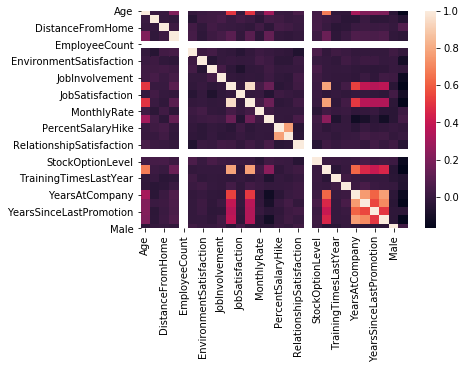

In [211]:
#lets check the correlation of the columns by heatmap
sns.heatmap(df.corr())
#which shows that its diagnally shows 1 so that we are ready for the next steps


In [215]:
#lets separate x and y
x = df1.drop(columns=["attrition"],axis=1)
y = df1[["attrition"]]

In [218]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=9,test_size=0.2,stratify=y)

In [219]:
print(y_train.shape,y_test.shape)

(1176, 1) (294, 1)


In [220]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [221]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [222]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [223]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.8435374149659864


cross_val_score =  0.8483044198797624


roc_auc_curve 0.5192523042467051


classification_report               precision    recall  f1-score   support

           0       0.85      1.00      0.91       247
           1       0.67      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.76      0.52      0.50       294
weighted avg       0.82      0.84      0.78       294



[[246   1]
 [ 45   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  

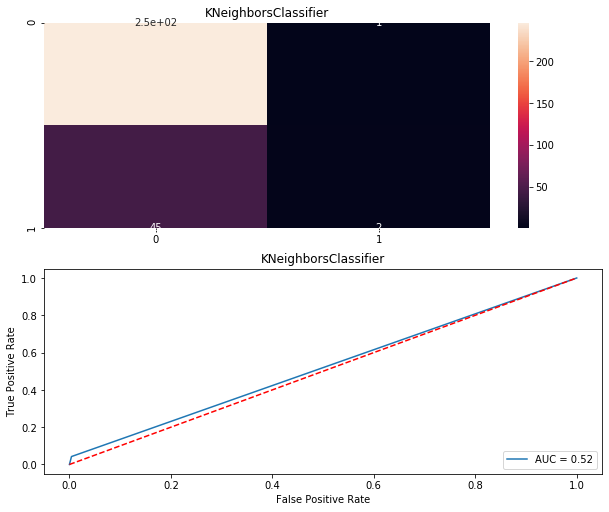

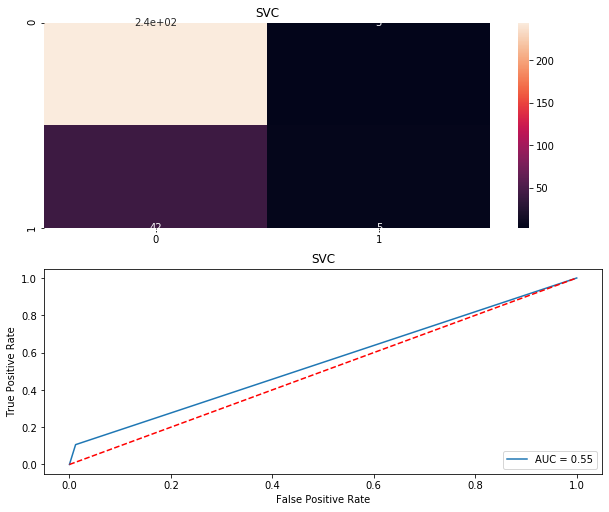

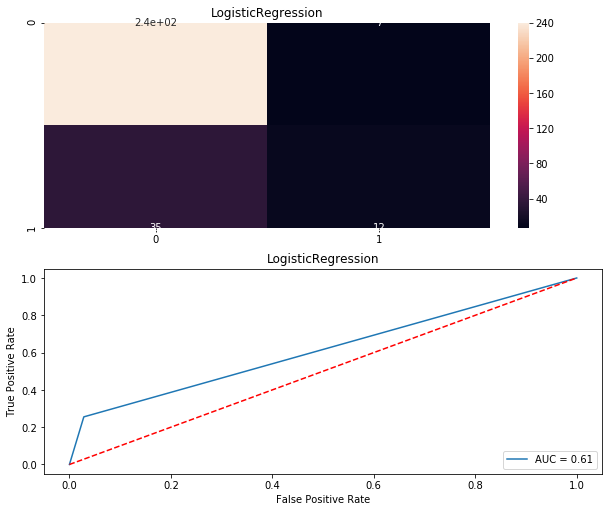

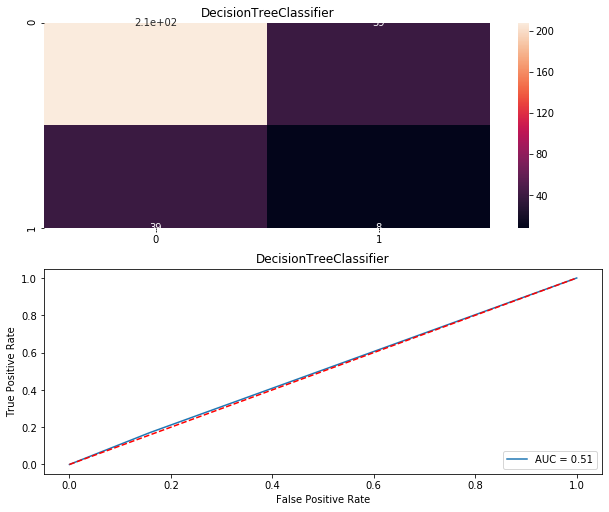

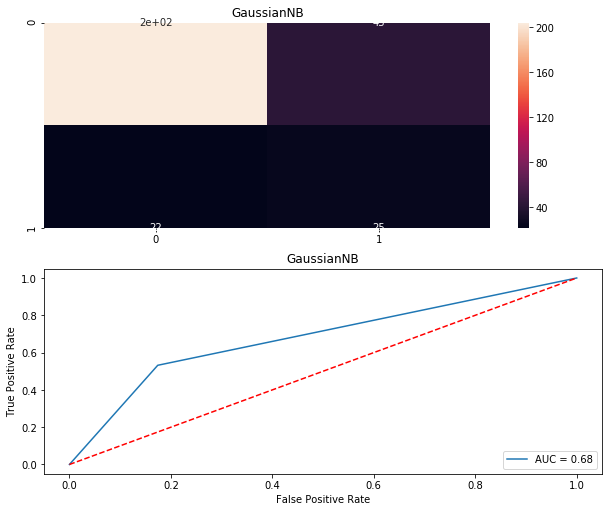

In [224]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [225]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,84.353741,84.830442,51.925230
1,SVC,84.693878,85.512125,54.711861
2,LogisticRegression,85.714286,86.735739,61.348953
3,DecisionTreeClassifier,73.469388,74.592208,50.615901
4,GaussianNB,77.891156,79.790296,67.891291


# I will choose Logistic Regression for this model as it is giving higher accuracy

In [227]:
from sklearn.externals import joblib

In [228]:
joblib.dump(LR , 'model_HRDataset.pkl')

['model_HRDataset.pkl']